# 使用K_means 算法聚类消费行为特征数据

In [1]:
import numpy as np
import pandas as pd

In [5]:
#参数初始化
inputfile ='consumption_data.xls'
k=3
threshold =2
iteration =500#循环最大次数
data =pd.read_excel(inputfile,index_col='Id')
data_zs =1.0*(data-data.mean())/data.std()#归一化

In [10]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters =3,n_jobs =4,max_iter =iteration)
model.fit(data_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1,

In [13]:
r =pd.concat([data_zs,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+['聚类类别']#命名表头

In [22]:
norm=[]
for i in range(k):
    norm_tmp =r[['R','F','M']][r['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp=norm_tmp.apply(np.linalg.norm,axis=1)#绝对距离
    norm.append(norm_tmp/norm_tmp.median())#相对距离

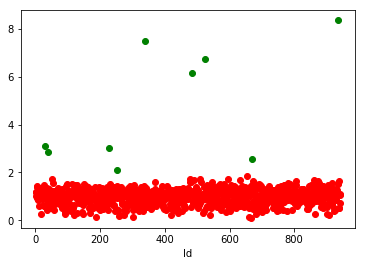

In [47]:
import matplotlib.pyplot as plt
norm[norm<=threshold].plot(style='ro')#正常点
norm[norm>=threshold].plot(style='go')#离群点

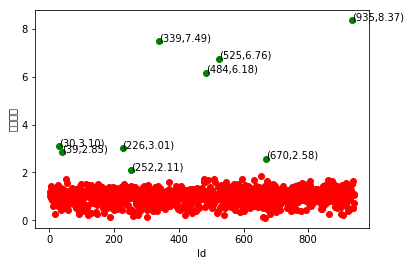

In [46]:
discrete_points =norm[norm>threshold]#离群点
for i in range(len(discrete_points)):#离群点做标记
    id =discrete_points.index[i]
    n =discrete_points.iloc[i]
    plt.annotate('(%s,%0.2f)'%(id,n),xy=(id,n),xytext =(id,n))
    plt.xlabel('编号')
    plt.ylabel('相对距离')
    
plt.show(discrete_points.plot(style='go'),norm[norm<=threshold].plot(style='ro'))